## Problem Statement

Predict whether a loan application will be approved or rejected to help the bank minimize financial risk while identifying eligible applicants.

**Type:** Binary classification  
**Domain:** Banking / Loan approval  

**Key Metrics and Rationale:**

- **Precision for approved loans (primary):** In banking, giving a loan to a risky applicant (false positive) can result in financial loss. High precision ensures that most approved loans are actually safe.  
- **Recall:** Important to ensure eligible applicants are not wrongly rejected, but slightly less critical than precision from a risk perspective.  
- **F1-score:** Balances precision and recall, useful if both misclassification types matter.  
- **ROC-AUC:** Measures overall ability of the model to differentiate between approved and rejected applicants, regardless of threshold.  

**Insight:** Since the cost of approving a risky loan is higher than rejecting a good applicant, **precision is the primary metric** for this problem.


## data overview & understanding

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.graph_objects as go
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, RobustScaler,FunctionTransformer, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,precision_score,recall_score,f1_score,accuracy_score,precision_recall_curve,roc_auc_score

In [ ]:
data=pd.read_csv(r"C:\projects\Loan_Predictor\data\raw\loan_approval_dataset.csv")

In [236]:
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [237]:
data.shape

(4269, 13)

In [238]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


## Dataset Column Description (Loan Prediction)

- **loan_id**  
  Unique identifier for each loan application (used for tracking only).

- **no_of_dependents**  
  Number of people financially dependent on the applicant.  
  *Example:* `0`, `3`

- **education**  
  Applicant’s highest education level.  
  *Values:* `Graduate`, `Not Graduate`

- **self_employed**  
  Whether the applicant is self-employed.  
  *Values:* `Yes`, `No`

- **income_annum**  
  Applicant’s annual income.  
  *Example:* `500000` (₹5 lakh)

- **loan_amount**  
  Amount of loan applied for.  
  *Example:* `1500000`

- **loan_term**  
  Loan repayment period (in years).  
  *Example:* `10`, `20`

- **cibil_score**  
  Credit score indicating creditworthiness (300–900).  
  *Example:* `750`

- **residential_assets_value**  
  Market value of residential property owned by the applicant.  
  *Example:* `3000000`

- **commercial_assets_value**  
  Market value of commercial/business property owned.  
  *Example:* `2000000`

- **luxury_assets_value**  
  Value of luxury items (cars, expensive jewelry, etc.).  
  *Example:* `1000000`

- **bank_asset_value**  
  Value of bank assets such as savings, FDs, or investments.  
  *Example:* `500000`

- **loan_status**  
  Final loan decision (target variable).  
  *Values:* `Approved`, `Rejected`


- there are no missing value and all datatypes is also fine

In [239]:
data.describe(include="object").T

,count,unique,top,freq
education,4269,2,Graduate,2144
self_employed,4269,2,Yes,2150
loan_status,4269,2,Approved,2656


In [240]:
round(data.describe(include='number').T,1)

,count,mean,std,min,25%,50%,75%,max
loan_id,4269.0,2135.0,1232.5,1.0,1068.0,2135.0,3202.0,4269.0
no_of_dependents,4269.0,2.5,1.7,0.0,1.0,3.0,4.0,5.0
income_annum,4269.0,5059123.9,2806839.8,200000.0,2700000.0,5100000.0,7500000.0,9900000.0
loan_amount,4269.0,15133450.5,9043363.0,300000.0,7700000.0,14500000.0,21500000.0,39500000.0
loan_term,4269.0,10.9,5.7,2.0,6.0,10.0,16.0,20.0
cibil_score,4269.0,599.9,172.4,300.0,453.0,600.0,748.0,900.0
residential_assets_value,4269.0,7472616.5,6503636.6,-100000.0,2200000.0,5600000.0,11300000.0,29100000.0
commercial_assets_value,4269.0,4973155.3,4388966.1,0.0,1300000.0,3700000.0,7600000.0,19400000.0
luxury_assets_value,4269.0,15126305.9,9103753.7,300000.0,7500000.0,14600000.0,21700000.0,39200000.0
bank_asset_value,4269.0,4976692.4,3250185.3,0.0,2300000.0,4600000.0,7100000.0,14700000.0


- **loan_id:** Sequential identifier for each loan application; used only for tracking and dropped before modeling.

- **no_of_dependents:** Applicants typically have 2–3 dependents, which increases financial responsibility and repayment risk.

- **income_annum:** The dataset contains mid to high-income applicants with a wide income range, strongly influencing repayment capacity.

- **loan_amount:** Loan amounts are high relative to income, making loan-to-income ratio a key risk indicator.

- **loan_term:** Most loans have a tenure around 10 years, balancing EMI affordability and long-term risk.

- **cibil_score:** Credit scores are mostly average, with a significant low-score segment indicating higher default risk.

- **residential_assets_value:** Residential asset values vary widely, reflecting differences in financial stability and collateral strength.

- **commercial_assets_value:** Many applicants have low or zero commercial assets, suggesting limited business ownership.

- **luxury_assets_value:** High luxury asset values indicate the presence of high-net-worth individuals in the dataset.

- **bank_asset_value:** Bank assets show moderate liquidity, which helps applicants manage repayment during financial stress.


- we will remove the loan_id column because it will not help to the at the model building and there is not any meaningfull variance

In [241]:
data.drop(columns=['loan_id'],inplace=True)

In [242]:
data.isnull().sum()

no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [243]:
data.duplicated().sum()

np.int64(0)

In [244]:
data.columns = data.columns.str.strip()

In [245]:
# 28 negative value in residential_assets_value column
data[data['residential_assets_value'] < 0]['residential_assets_value']

59     -100000
196    -100000
559    -100000
702    -100000
737    -100000
784    -100000
904    -100000
1089   -100000
1163   -100000
1350   -100000
1392   -100000
1773   -100000
1806   -100000
1866   -100000
1933   -100000
1950   -100000
2707   -100000
3019   -100000
3164   -100000
3180   -100000
3431   -100000
3730   -100000
3747   -100000
3962   -100000
4076   -100000
4130   -100000
4206   -100000
4243   -100000
Name: residential_assets_value, dtype: int64

- could be reason the customer doesnt share the residential_asset_value
- or could be not own house at the customer name and living at rent (common for business professsinal and rich people) 


In [246]:
# we can replace the negative value with 0 as it is not possible to have negative assets value 
data['residential_assets_value']= data['residential_assets_value'].apply(lambda x:0 if x<0 else x)

In [247]:
data[data['residential_assets_value'] < 0]['residential_assets_value']

Series([], Name: residential_assets_value, dtype: int64)

## EDA

In [248]:
numerical_col=data.select_dtypes(include=['number']).columns
cat_col=data.select_dtypes(include=['object']).columns

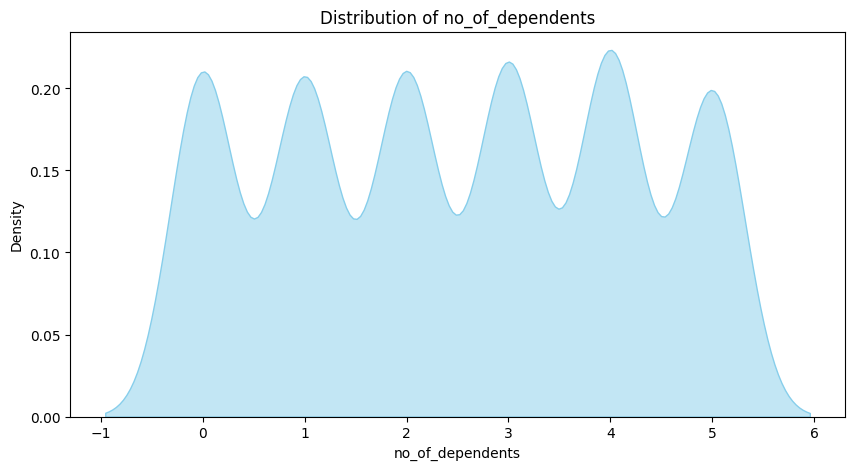

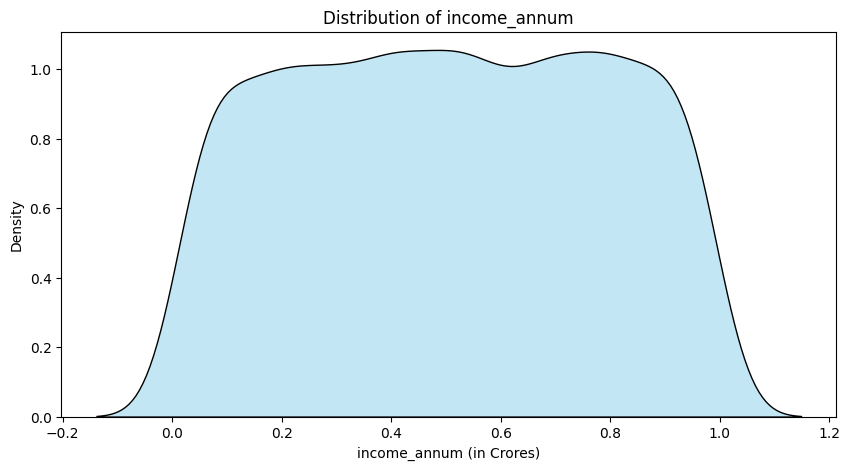

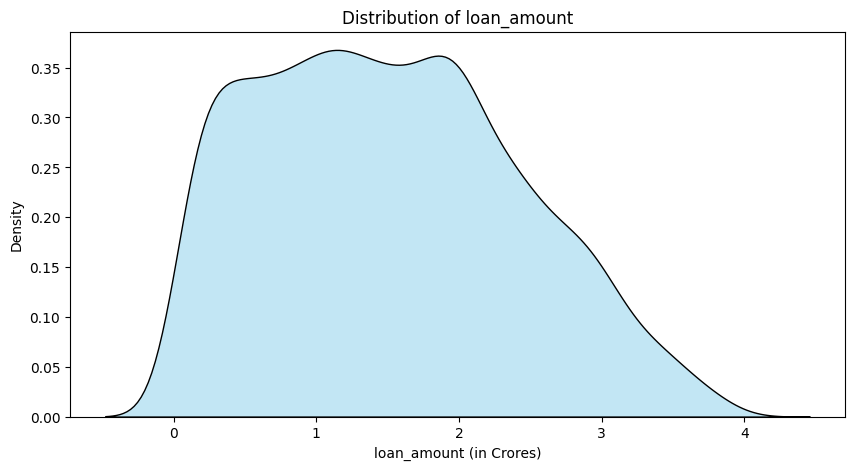

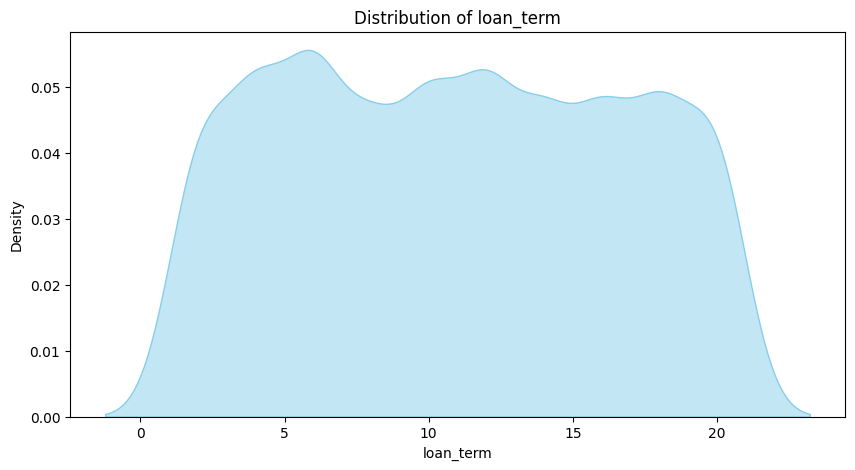

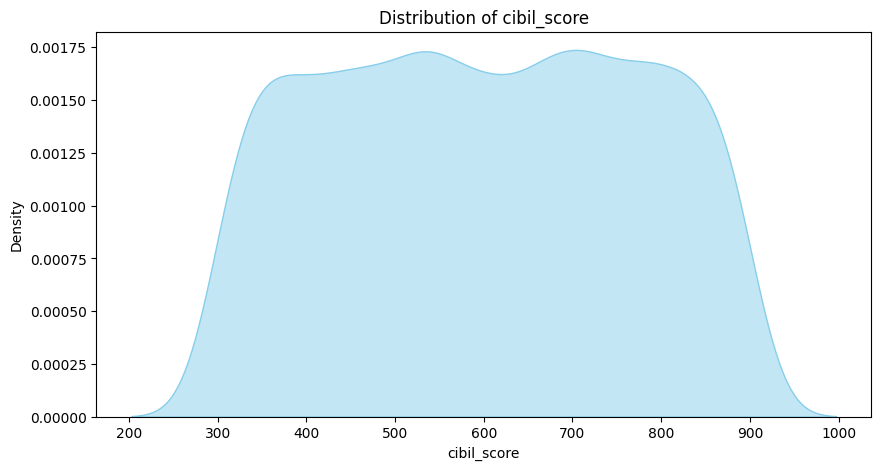

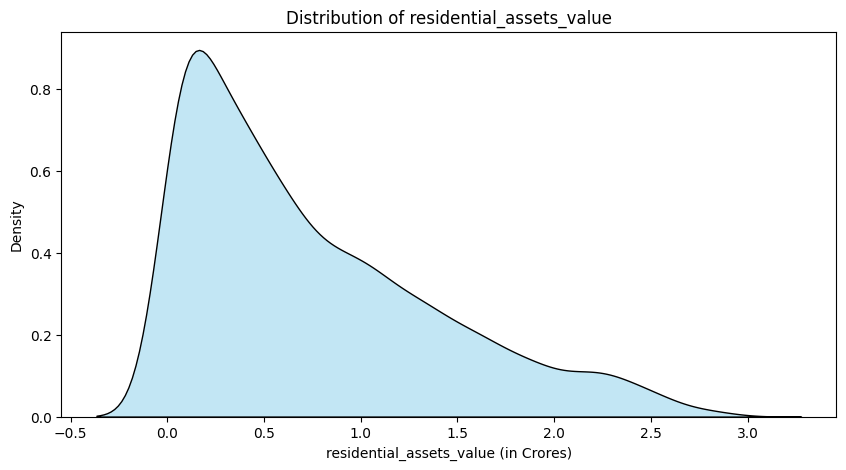

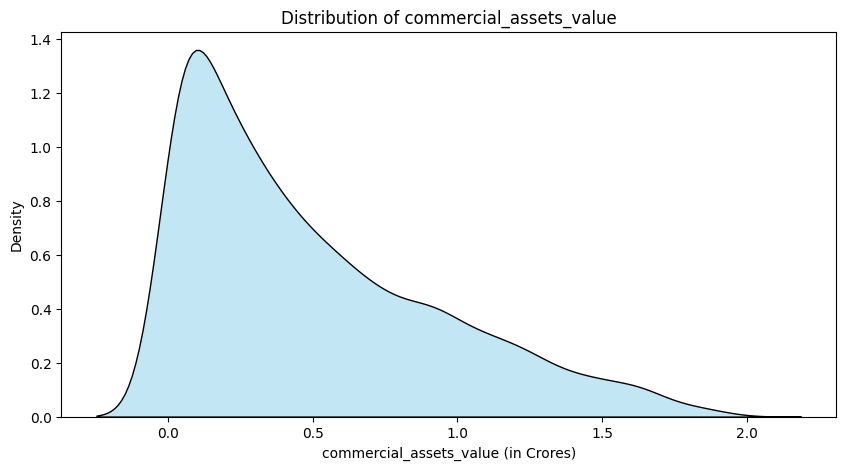

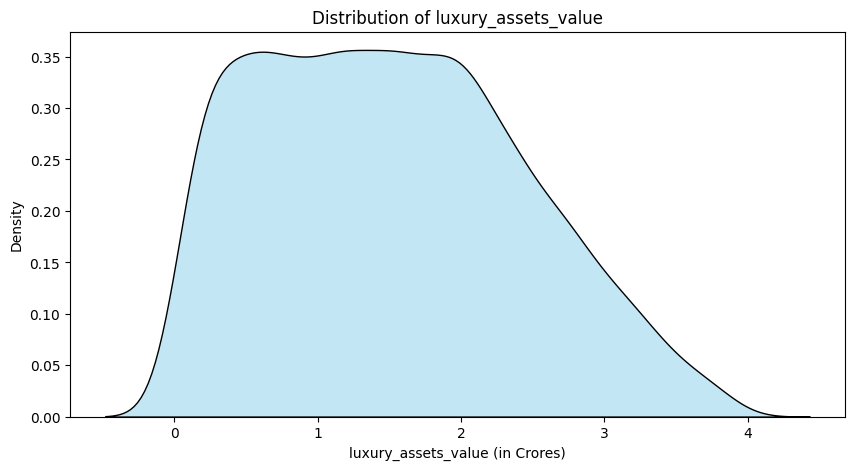

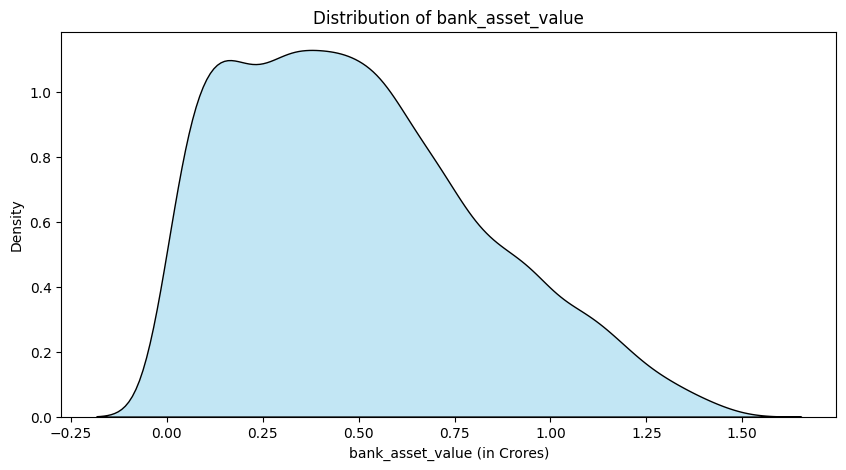

In [249]:
# Using original scale for small-range features
# and converting large monetary values to crores for better readability in the plots

for col in numerical_col:
    plt.figure(figsize=(10,5))
    
    if col in ['no_of_dependents', 'loan_term', 'cibil_score']:
        sns.kdeplot(
            data[col],
            color='skyblue',
            fill=True,
            alpha=0.5
        )
        plt.xlabel(col)
    
    else:
        sns.kdeplot(
            data[col] / 1e7,  # converting to crores
            color='skyblue',
            fill=True,
            alpha=0.5,
            edgecolor='black'
        )
        plt.xlabel(f'{col} (in Crores)')
    
    plt.title(f'Distribution of {col}')
    plt.ylabel('Density')
    plt.show()


## 🏠 Residential Asset Value

### Insight
Residential asset values are right-skewed. This means most applicants own homes with medium value, while only a few applicants have very high-value residential properties.

### Action
- **Logistic Regression** → Apply log transformation and standard scaling to reduce skewness and make the model more stable.
- **Tree-based models** → Use raw values, as tree models work well with skewed data.
- **Business Action** → Higher residential asset value lowers loan risk, but after a point, extra value does not reduce risk much.

---

## 🏢 Commercial Asset Value

### Insight
Commercial asset values are also right-skewed. Most applicants have little or no commercial property, and only a small group owns high-value commercial assets.

### Action
- **Linear models** → Apply log transformation so very large values do not dominate the model.
- **Tree-based models** → No transformation needed.
- **Business Action** → Commercial assets reduce risk only when their value crosses a meaningful level.

---

## 🏦 Bank Asset Value

### Insight
Bank asset values are right-skewed, meaning most applicants have low to medium bank balances, while a few applicants hold very large amounts.

### Action
- **Logistic Regression** → Apply log transformation to make the effect easier to understand.
- **Tree-based models** → Use raw values.
- **Business Action** → More bank balance improves approval chances, but the benefit reduces after a certain limit.

---

## 💎 Luxury Asset Value

### Insight
Luxury asset values show mild right skewness, indicating that only a small number of applicants own luxury assets.

### Action
- **Linear models** → Log transformation can be applied if needed.
- **Tree-based models** → No transformation required.
- **Business Action** → Luxury assets help as additional support but are not a main decision factor.

---

## 📈 CIBIL Score

### Insight
CIBIL scores are close to a normal distribution. Most applicants have scores between 400 and 800, showing average to good credit behavior.

### Action
- **Logistic Regression** → Apply standard scaling.
- **Tree-based models** → No scaling required.
- **Business Action** → Higher CIBIL score clearly increases the chances of loan approval.

---

## ⏳ Loan Term

### Insight
Loan term is roughly normally distributed, with most applicants choosing loan durations between 4 and 80 months.

### Action
- **Linear models** → Apply standard scaling.
- **Tree-based models** → Use raw values.
- **Business Action** → Longer loan duration increases risk because the repayment period is longer.

---

## 💰 Annual Income

### Insight
Annual income is close to a normal distribution. Most applicants earn between ₹20–85 lakhs per year.

### Action
- **Logistic Regression** → Apply standard scaling (use log only if slight skew is present).
- **Tree-based models** → No transformation needed.
- **Business Action** → Higher income improves repayment ability, but income alone does not guarantee approval.


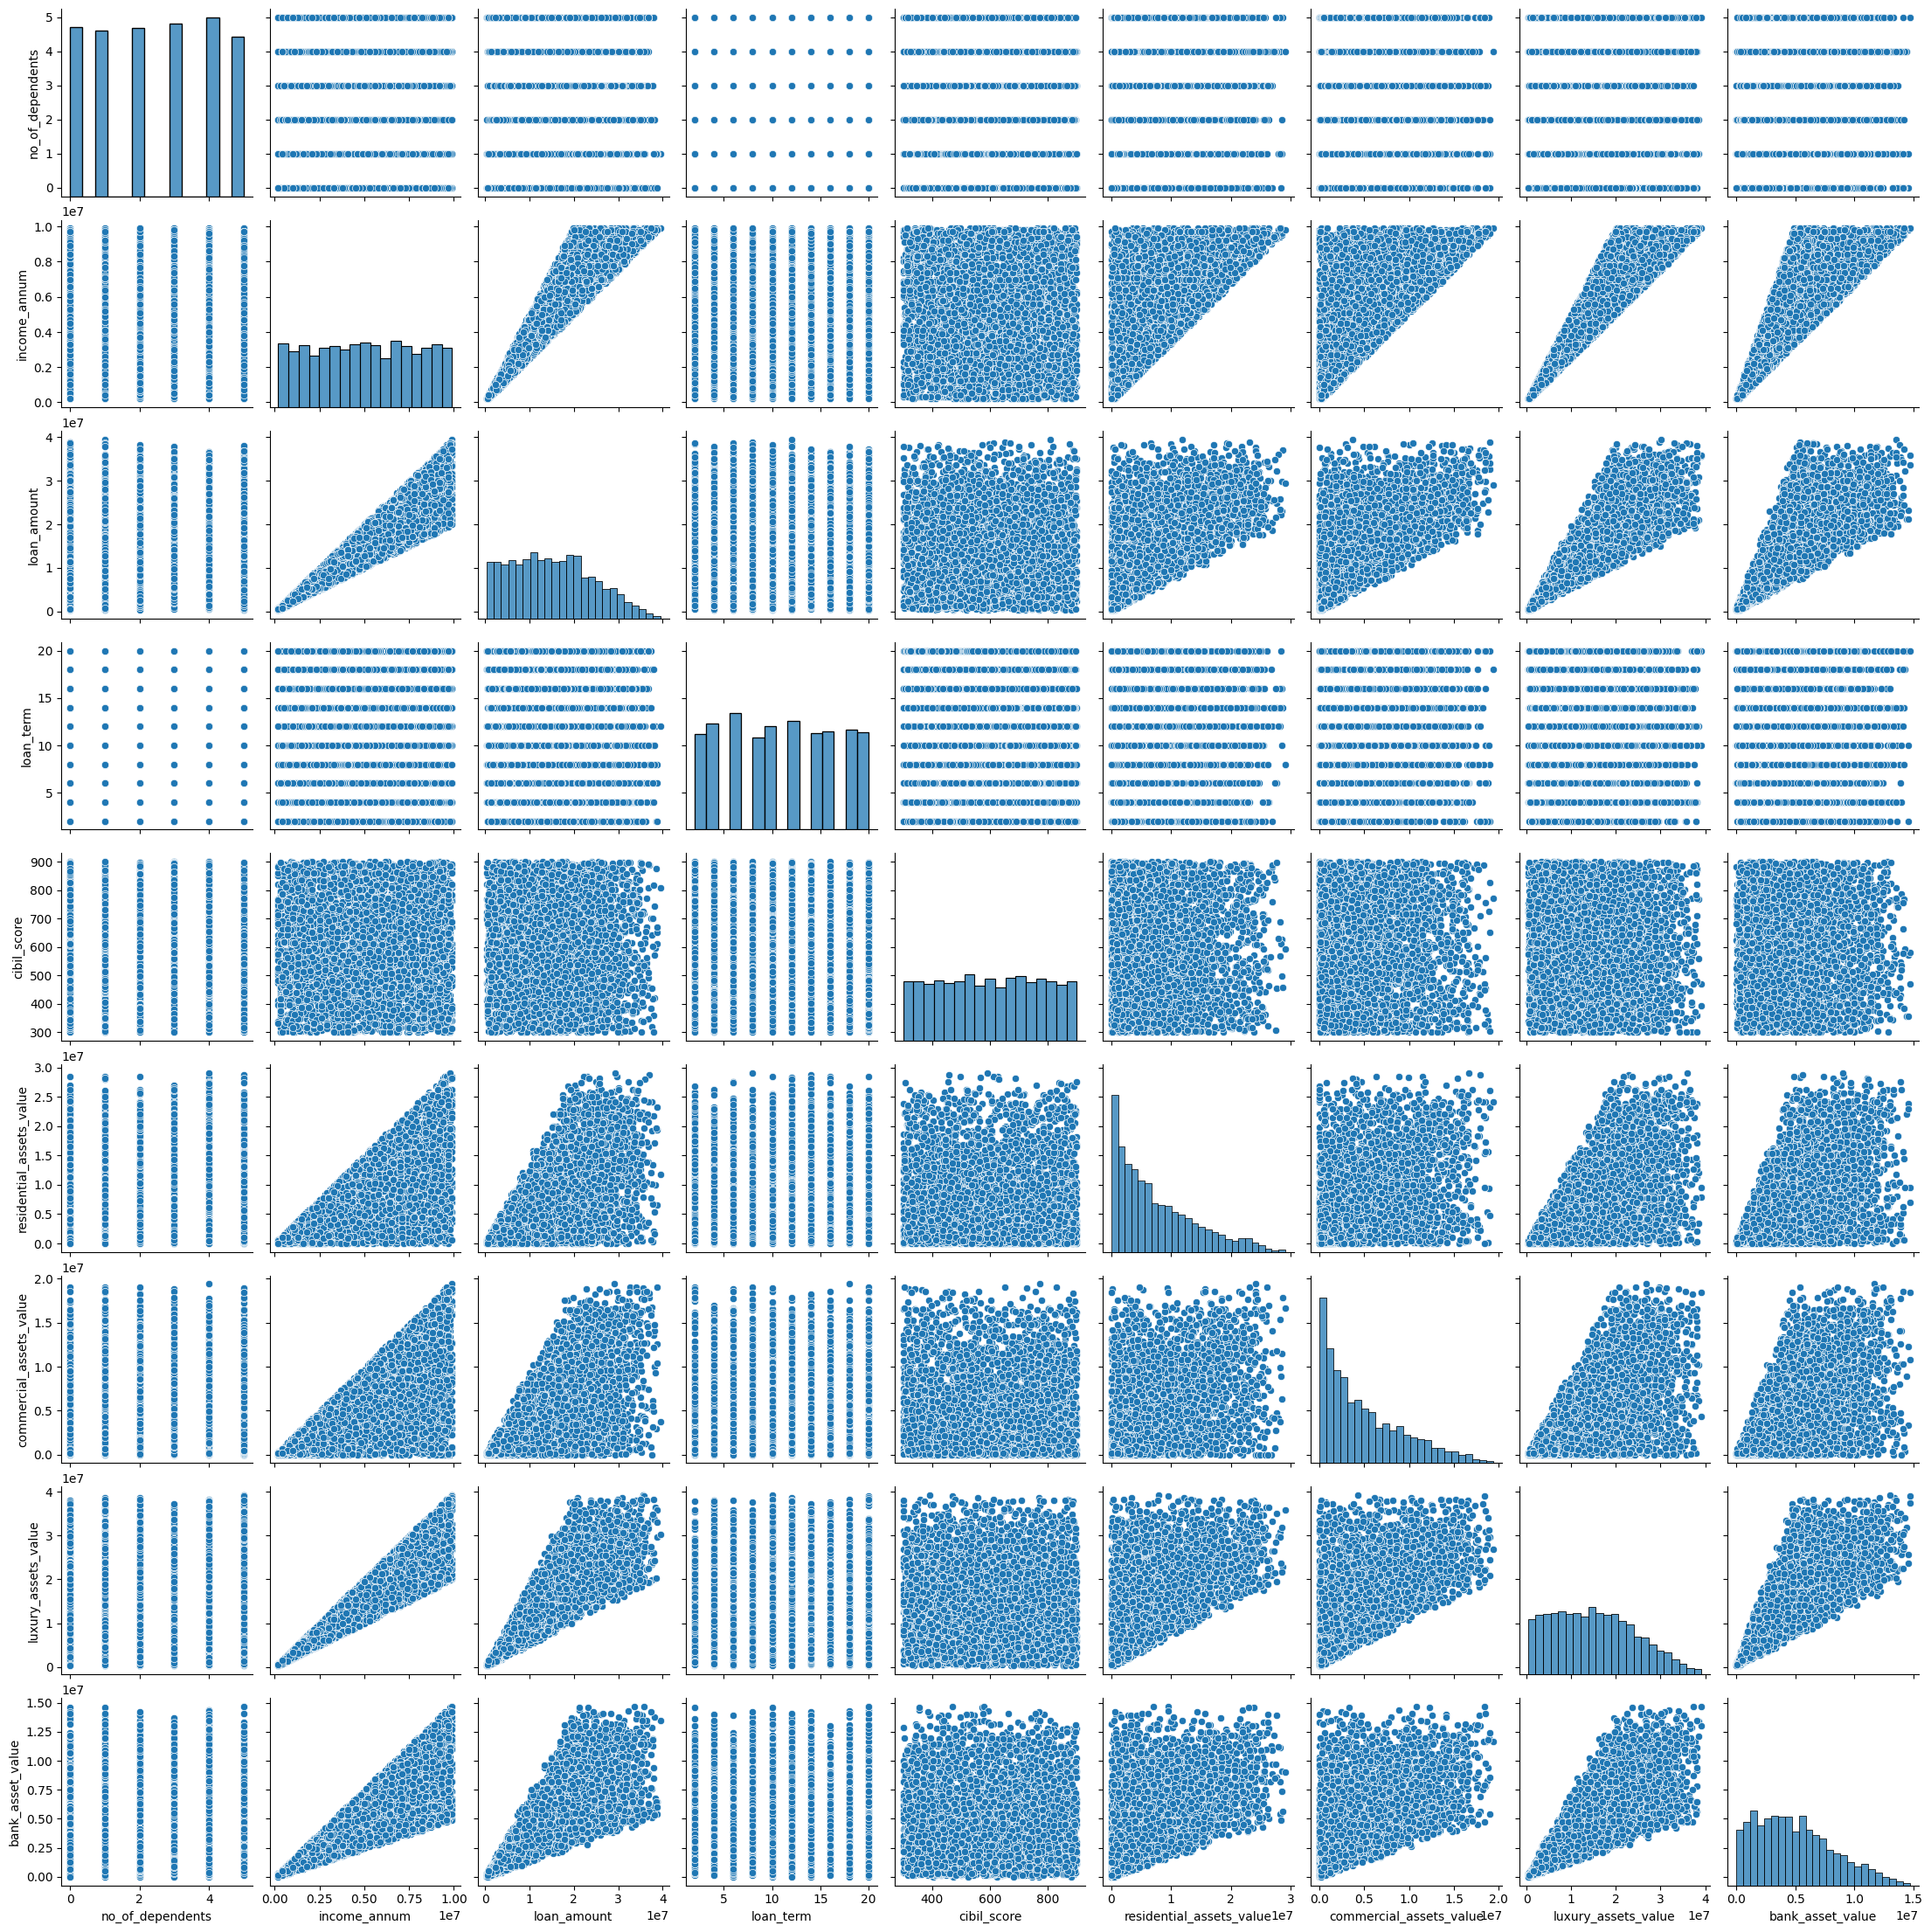

In [250]:
sns.pairplot(data[numerical_col])

<Axes: >

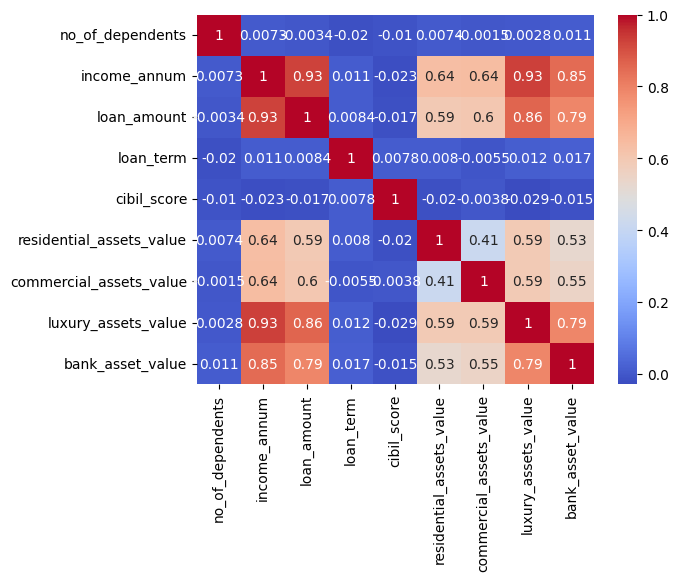

In [251]:
# for to see the correlation 
sns.heatmap(data.corr(numeric_only=True),annot=True,cmap='coolwarm')

# Multicollinearity Check

High correlation observed among income, loan, and asset-related features:

- income_annum ↔ loan_amount : 0.93
- income_annum ↔ luxury_assets_value : 0.93
- loan_amount ↔ luxury_assets_value : 0.86
- income_annum ↔ bank_asset_value : 0.85
- loan_amount ↔ bank_asset_value : 0.79
- luxury_assets_value ↔ bank_asset_value : 0.79


*solution:* ridge or drop anyone or combine them.

# Why Combine Features

These variables represent similar financial capacity, causing multicollinearity
and inflated Logistic Regression coefficients.

Combining loan_amount and income_annum reduces correlation and improves
interpretability.


In [252]:
# we are using the loan_to_income ratio as a new feature to capture the relationship between loan amount and income, which can be a strong predictor of loan 
data['loan_to_income'] = data['loan_amount'] / data['income_annum']
data = data.drop(columns=['loan_amount', 'income_annum'])


<Axes: >

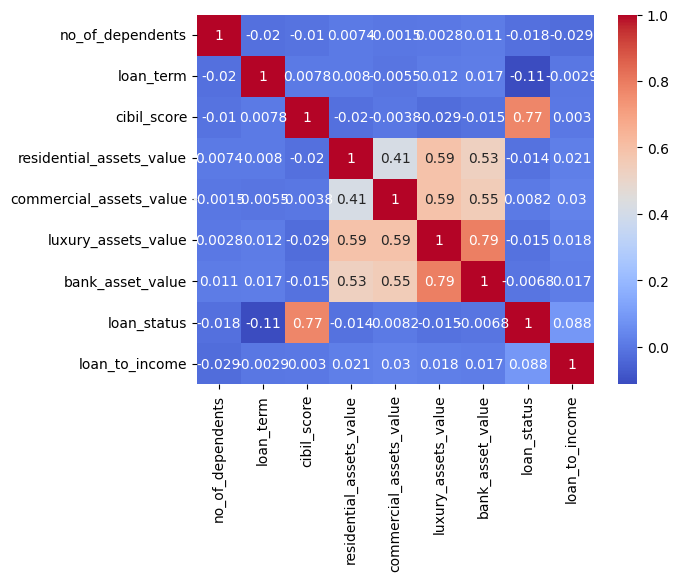

In [277]:
sns.heatmap(data.corr(numeric_only=True),annot=True,cmap='coolwarm')

([<matplotlib.patches.Wedge at 0x20d77001090>,
 [Text(-0.4156115054896216, 1.0292555933803083, ' Approved'),
  Text(0.4137392268778039, -1.024619369396537, ' Rejected')],
 [Text(-0.2283991156294317, 0.5656269477135027, '62.2%'),
  Text(0.226526907023594, -0.5609906954614523, '37.8%')])

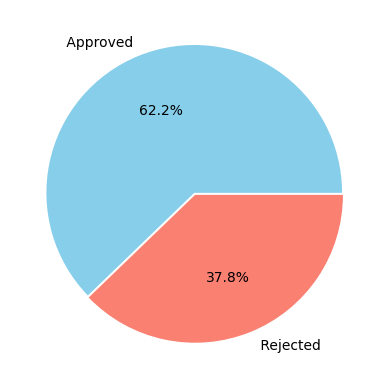

In [254]:
plt.pie(data.loan_status.value_counts(normalize=True)*100,
        explode=[0.01,0.005],
        labels=data.loan_status.value_counts().index
        ,autopct='%1.1f%%'
        ,colors=['skyblue','salmon'])

- class imbalance we can use the class_weight and alternative like oversampling or undersampling or smote or difftrent metrices (precisio,recall,accroding to the problem)

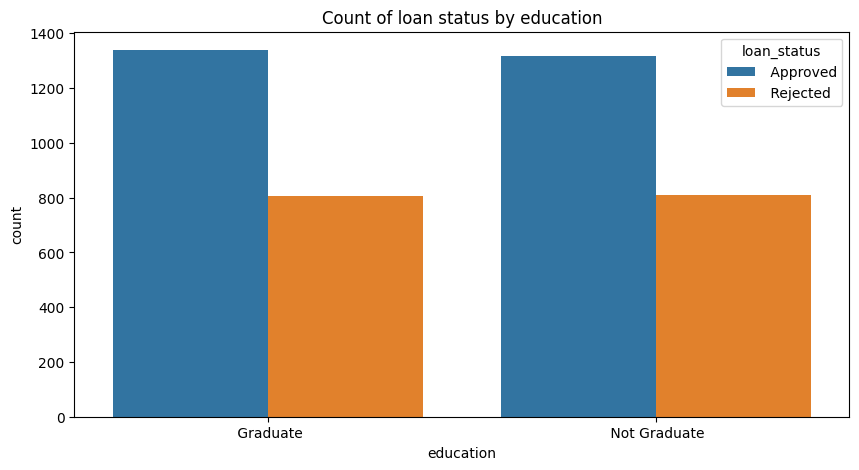

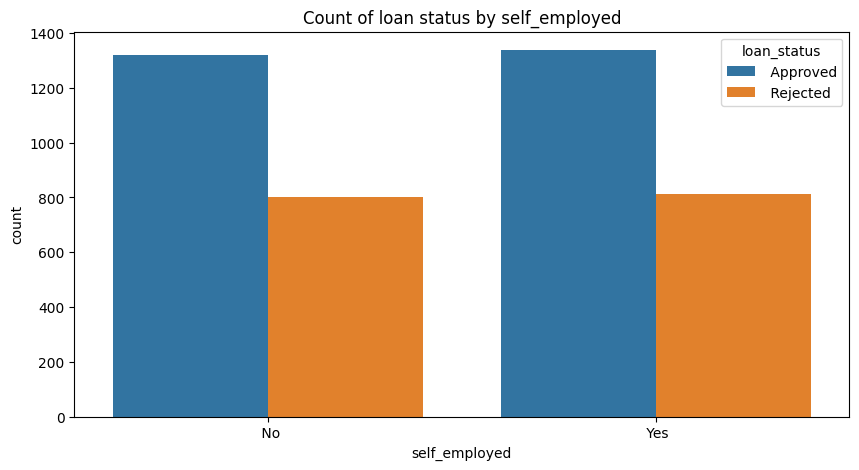

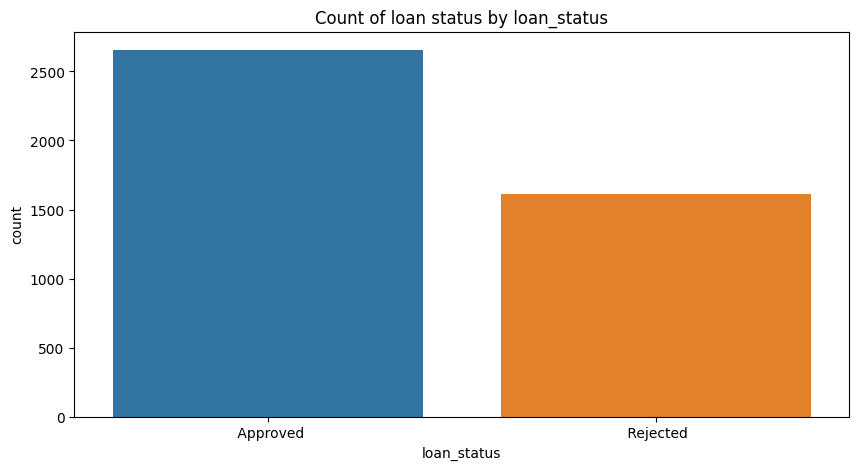

In [255]:
for col in cat_col:
    plt.figure(figsize=(10,5))
    sns.countplot(x=col,hue='loan_status',data=data)
    plt.title(f'Count of loan status by {col}')
    plt.show()

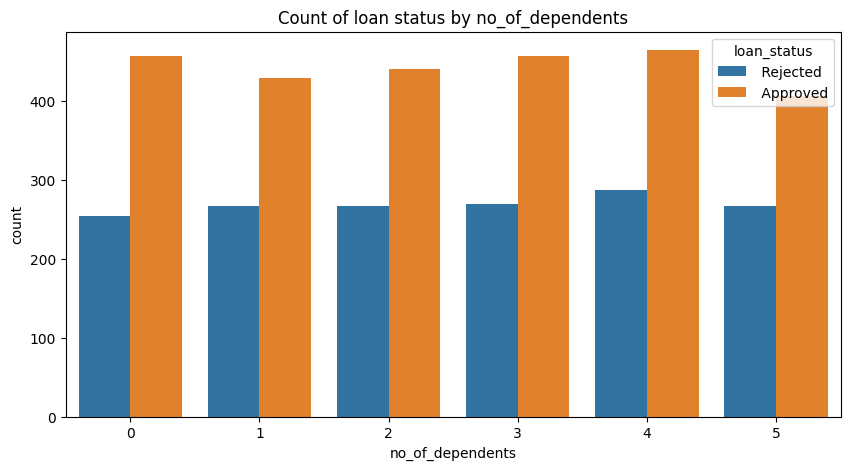

In [256]:
plt.figure(figsize=(10,5))
sns.countplot(x='no_of_dependents',hue='loan_status',data=data)
plt.title(f'Count of loan status by no_of_dependents')
plt.show()

- whether the applicant is graduated or not the probablity of approval wiil be almost same for the both 
- and also same for the salf_employed or not according to data 
- and also not dependent at the no_of_dependents 

## feature engineering

In [257]:
data['loan_status'] = (
     data['loan_status']
    .astype(str)
    .str.strip()
    .str.lower() )

data['loan_status']=data['loan_status'] = data['loan_status'].map({
    'rejected': 0,
    'approved': 1
})




In [258]:
data.columns

Index(['no_of_dependents', 'education', 'self_employed', 'loan_term',
       'cibil_score', 'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status',
       'loan_to_income'],
      dtype='object')

In [259]:
x_train,x_test,y_train,y_test=train_test_split(data.drop(columns=['loan_status']),data['loan_status'],test_size=0.2,random_state=42)

- preventing the problem of  data leackage to do train test split beforly

In [260]:
log_standard = Pipeline([
    ('log', FunctionTransformer(np.log1p, validate=False)),
    ('scaler', StandardScaler())
])

preprocessor_linear = ColumnTransformer(
    transformers=[
        # right skewed asset values
        ('log_assets', log_standard, [
            'residential_assets_value',
            'commercial_assets_value',
            'bank_asset_value',
            'luxury_assets_value'
        ]),

        # ratio feature (log-scaled)
        ('log_ratio', log_standard, [
            'loan_to_income'
        ]),

        # approximately normal features
        ('normal_scale', StandardScaler(), [
            'cibil_score',
            'loan_term'
        ]),

        ('education_ohe', OneHotEncoder(drop='first', handle_unknown='ignore'), [
            'education'
        ]),

        ('self_employed_bin', OneHotEncoder(drop='if_binary'), [
            'self_employed'
        ])
    ],
    remainder='passthrough'
)


In [261]:
preprocessor_linear

,transformers,"[('log_assets', ...), ('log_ratio', ...), ...]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,func,<ufunc 'log1p'>
,inverse_func,None
,validate,False


## model building



In [288]:
model=Pipeline([('preprocess',preprocessor_linear),('classifier',LogisticRegression(max_iter=200,class_weight='balanced',solver='lbfgs',penalty='l2',C=1.0,random_state=42))])

model.fit(x_train,y_train)

,steps,"[('preprocess', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('log_assets', ...), ('log_ratio', ...), ...]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [289]:
train_prob_pred=model.predict_proba(x_train)[:,1]
test_prob_pred=model.predict_proba(x_test)[:,1] # probablity for class 1

train_pred=(train_prob_pred >=0.53).astype(int)
# test data prediction
prediction=(test_prob_pred >=0.53).astype(int)

In [290]:
test_prob_pred.shape

(854,)

In [291]:
#   testing metrices
test_accuracy=accuracy_score(y_test,prediction)
test_precision=precision_score(y_test,prediction)
test_recall=recall_score(y_test,prediction)

#    training metrices
train_accuracy=accuracy_score(y_train,train_pred)
train_precision=precision_score(y_train,train_pred)
train_recall=recall_score(y_train,train_pred)

In [292]:
print("-"*50)
print(f'test_accuracy: {test_accuracy}')
print("-"*50)
print(f'test_precision: {test_precision}')
print("-"*50)
print(f'test_recall: {test_recall}')
print("-"*80)
print(f"train_accuracy:{train_accuracy}")
print("-"*50)
print(f"train_precision:{train_precision}")
print("-"*50)
print(f"train_recall:{train_recall}")
print("-"*50)

--------------------------------------------------
test_accuracy: 0.9121779859484778
--------------------------------------------------
test_precision: 0.9600798403193613
--------------------------------------------------
test_recall: 0.8973880597014925
--------------------------------------------------------------------------------
train_accuracy:0.9226939970717423
--------------------------------------------------
train_precision:0.967741935483871
--------------------------------------------------
train_recall:0.9056603773584906
--------------------------------------------------


- here we can see the there are no overfitting the accuracy and other metrices is almost similar to the training ones there is no gap almost mmodel have captured the real pattern of the data

In [293]:
from sklearn.metrics import roc_auc_score
roc_auc=roc_auc_score(y_test, test_prob_pred) 
print(f"roc_auc:{roc_auc}")

roc_auc:0.969128414531118


- good diffrentiator

<Axes: >

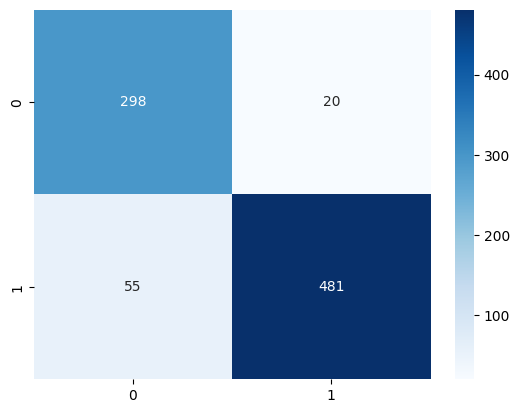

In [294]:
sns.heatmap(confusion_matrix(y_test,prediction),annot=True,cmap='Blues',fmt='d')

In [295]:
precision,recall,thresholds=precision_recall_curve(y_test,test_prob_pred)

In [296]:
precision = precision[:-1]
recall = recall[:-1]

# 3️⃣ Create interactive plot
fig = go.Figure()

# PR Curve
fig.add_trace(go.Scatter(
    x=recall,
    y=precision,
    mode='lines+markers',
    marker=dict(size=6),
    text=[f"Threshold={t:.2f}" for t in thresholds],  # hover text
    hovertemplate='Recall: %{x:.2f}<br>Precision: %{y:.2f}<br>%{text}<extra></extra>',
    name='PR Curve'
))

# Layout
fig.update_layout(
    title="Precision-Recall Curve with Thresholds",
    xaxis_title="Recall",
    yaxis_title="Precision",
    hovermode="closest",
    width=800,
    height=600
)

fig.show()

In [297]:
pr_curve=pd.DataFrame({"precision":precision,"recall":recall,"thresholds":thresholds})

In [298]:
model.named_steps

{'preprocess': ColumnTransformer(remainder='passthrough',
                   transformers=[('log_assets',
                                  Pipeline(steps=[('log',
                                                   FunctionTransformer(func=<ufunc 'log1p'>)),
                                                  ('scaler', StandardScaler())]),
                                  ['residential_assets_value',
                                   'commercial_assets_value', 'bank_asset_value',
                                   'luxury_assets_value']),
                                 ('log_ratio',
                                  Pipeline(steps=[('log',
                                                   FunctionTransformer(func=<ufunc 'log1p'>)),
                                                  ('scaler', StandardScaler())]),
                                  ['loan_to_income']),
                                 ('normal_scale', StandardScaler(),
                                  ['cibil_score',

In [299]:
model_coef=model.named_steps['classifier'].coef_[0]

In [300]:
coeff_df=pd.DataFrame({'feature':x_train.columns,'coefficient':model_coef}).sort_values(by='coefficient',ascending=False)

In [301]:
coeff_df['odds_ratio']=np.exp(coeff_df['coefficient'])

In [302]:
coeff_df

,feature,coefficient,odds_ratio
5,residential_assets_value,4.347104,77.254379
4,cibil_score,0.516366,1.675926
0,no_of_dependents,0.232132,1.261286
8,bank_asset_value,0.127804,1.136331
1,education,0.102319,1.107737
2,self_employed,0.048642,1.049844
9,loan_to_income,-0.001250,0.998751
7,luxury_assets_value,-0.068830,0.933485
3,loan_term,-0.161703,0.850694
6,commercial_assets_value,-0.788131,0.454694


**why logistic regression:**
- logistic regression is choosen because of the problem that we are solving here is interpretablity is high concern. and even its giving the best metrices that is enough for this problem and so simple and interpratable model easy to expliain to the customer and non-tech stackholders.


# Model Insights 

- Multicollinearity between income and loan amount has been successfully reduced
  using the `loan_to_income` ratio.
- No feature pair shows extreme correlation (> 0.9), indicating a stable feature
  space for Logistic Regression.

- `residential_assets_value` emerged as the strongest predictor with a very high
  coefficient and odds ratio, suggesting that ownership/value of residential
  property significantly increases loan approval probability.

- `cibil_score` remains an important positive driver, confirming the relevance
  of credit history in loan approval decisions.

- `commercial_assets_value` and `loan_term` show negative coefficients, indicating
  higher commercial exposure or longer tenure slightly reduces approval odds.

- `loan_to_income` has a near-zero coefficient, implying that after asset
  consideration, relative loan burden plays a minor role in approval decisions.

- Overall, the model indicates that **asset ownership dominates risk assessment**,
  while income-related effects are now secondary and more stable.
